In [3]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import time

In [4]:
NAME="InOrOut{}".format(int(time.time()))
TensorBoard=TensorBoard(log_dir="logs/{}".format(NAME))
DATADIR="/home/sameer/Tennis_InOrOut"
CATEGORIES=["In","Out"]
IMG_SIZE=200

In [5]:
training_data=[]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass

random.shuffle(training_data)
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1 , IMG_SIZE, IMG_SIZE,1)
X=X/255

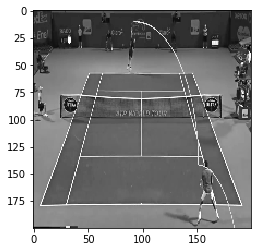

In [6]:

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),cv2.IMREAD_GRAYSCALE)
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
model_name="1Epoch"

In [8]:
model=Sequential()
model.add(Conv2D(128, (3,3) ,input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
model.fit(X,y,batch_size=2, epochs=1,validation_split=.2,callbacks=[TensorBoard])
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6073 samples, validate on 1519 samples
6073/6073 [==============================] - 959s 158ms/sample - loss: 0.6941 - acc: 0.4971 - val_loss: 0.6931 - val_acc: 0.5036


In [9]:
model_name="1Epoch"

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


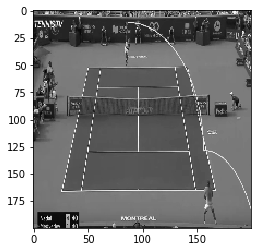

In


In [10]:
img_loc=r"test//b.png"
model=tf.keras.models.load_model(model_name)
img_array=cv2.imread(img_loc,cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array=new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
new_array = new_array/255
predict=model.predict(new_array)
print(CATEGORIES[int(predict[0][0])])